In [1]:
!pip install -q numpy matplotlib scikit-learn

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, make_circles
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

def generate_data(kind='linear'):
    if kind == 'linear':
        X, y = make_classification(n_samples=100, n_features=2, n_redundant=0,
                                   n_informative=2, n_clusters_per_class=1, class_sep=2.0, random_state=42)
    elif kind == 'nonlinear':
        X, y = make_circles(n_samples=100, factor=0.3, noise=0.1, random_state=42)
    return StandardScaler().fit_transform(X), y


Linear data: Two classes are clearly linearly separable with a straight line

Non Linear Data: Like concentric circle -> no staright line can separate them

Here StandardScaler is used to normalize the data for better model performance

In [9]:
def plot_decision_boundary(clf, X, y, title):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(6, 5))
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()


In [12]:
def visualize_kernels():
    for kernel, data_type in [('linear', 'linear'), ('poly', 'linear'), ('rbf', 'nonlinear')]:
        X, y = generate_data(kind=data_type)
        if kernel == 'poly':
            clf = SVC(kernel='poly', degree=4, C=1)
        else:
            clf = SVC(kernel='rbf', C=1, gamma='0.5')

        clf.fit(X, y)
        plot_decision_boundary(clf, X, y, f"SVM with {kernel.upper()} kernel")


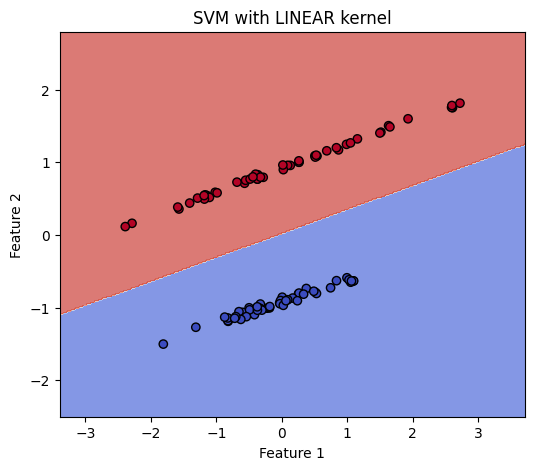

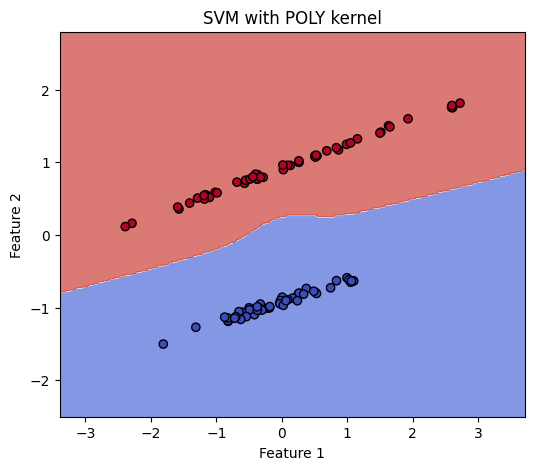

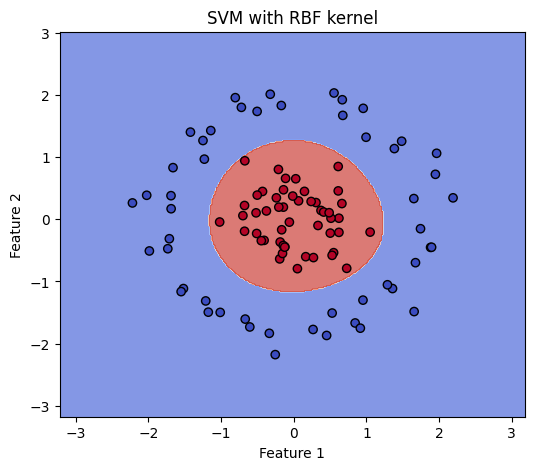

In [13]:
visualise_data()

From the visualizations we can see the following:



*   SVM with Linear kernel is used on linearly seperable data. A straight line boundary separating two classes.
*   SVM with Polynomial Kernel is used on same data (to show how overfitting can occur). It outputs a wavy decicion boundary. This fits more complex patterns. May overfit if use necessarily on simple data.

*   SVM with RBF Kernel is used on nonlinear data. It outputs a circular decision boundary separating inner and outer circles. This is more flexible kernel





In [17]:
from matplotlib.animation import FuncAnimation
X, y = make_circles(n_samples=200, factor=0.3, noise=0.1, random_state=0)
X = StandardScaler().fit_transform(X)

def get_mesh(X):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, h),
                       np.arange(y_min, y_max, h))
xx, yy = get_mesh(X)


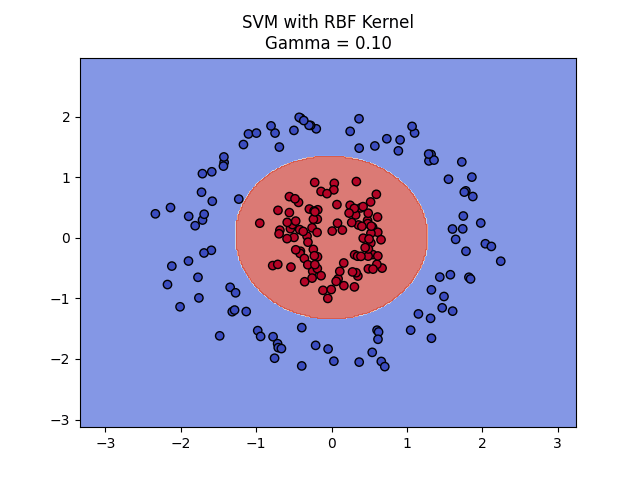

In [18]:
fig, ax = plt.subplots()
Z = None

gamma_values = np.logspace(-1, 2, 30)
contour = [None]

def update_gamma(i):
    ax.clear()
    gamma = gamma_values[i]
    clf = SVC(kernel='rbf', gamma=gamma, C=1.0)
    clf.fit(X, y)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.7, cmap=plt.cm.coolwarm)
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    ax.set_title(f"SVM with RBF Kernel\nGamma = {gamma:.2f}")
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())

ani = FuncAnimation(fig, update_gamma, frames=len(gamma_values), interval=300)
plt.close()
ani.save("gamma_variation.gif", writer='pillow')
from IPython.display import Image
Image("gamma_variation.gif")


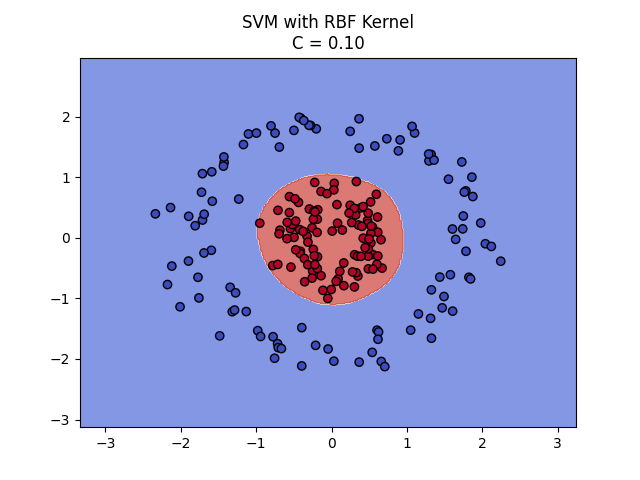

In [19]:
fig, ax = plt.subplots()
C_values = np.logspace(-1, 2, 30)
gamma = 5

def update_C(i):
    ax.clear()
    C = C_values[i]
    clf = SVC(kernel='rbf', gamma=gamma, C=C)
    clf.fit(X, y)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.7, cmap=plt.cm.coolwarm)
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    ax.set_title(f"SVM with RBF Kernel\nC = {C:.2f}")
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())

ani2 = FuncAnimation(fig, update_C, frames=len(C_values), interval=300)
plt.close()
ani2.save("C_variation.gif", writer='pillow')
Image("C_variation.gif")
